In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read the image from folder

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Path
image_file_path = '/content/drive/MyDrive/AI Class/data_processing/images/flower.jpg'

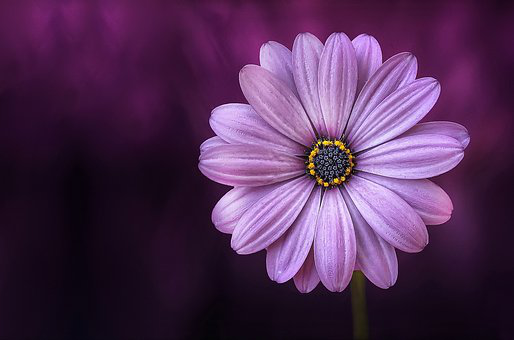

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_file_path)
image

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_file_path)
image = np.array(image)
image = tf.convert_to_tensor(image)

In [ ]:
print(image)

tf.Tensor(
[[[81 24 69]
  [81 24 69]
  [81 24 69]
  ...
  [32  7 29]
  [34  9 30]
  [34  9 30]]

 [[81 24 69]
  [81 24 69]
  [81 24 69]
  ...
  [33  8 30]
  [34  9 30]
  [34  9 30]]

 [[81 24 69]
  [81 24 69]
  [81 24 69]
  ...
  [34  9 31]
  [37  9 32]
  [37  9 32]]

 ...

 [[25 12 29]
  [25 12 29]
  [24 11 28]
  ...
  [20  5 24]
  [20  7 25]
  [20  7 25]]

 [[24 11 28]
  [24 11 28]
  [24 11 28]
  ...
  [20  5 24]
  [20  7 25]
  [20  7 25]]

 [[22  9 26]
  [22  9 26]
  [22  9 26]
  ...
  [20  5 24]
  [20  7 25]
  [20  7 25]]], shape=(340, 514, 3), dtype=uint8)


# Data Augmentation

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1, 2, 1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1, 2, 2)
  plt.title('Augmented image')
  plt.imshow(augmented)

## Flipped

In [ ]:
flipped = tf.image.flip_left_right(image)

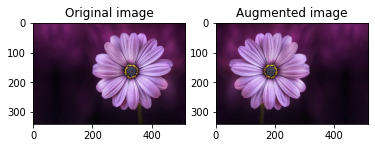

In [ ]:
visualize(image.numpy(), flipped.numpy())

## Grayscale an image

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(image)

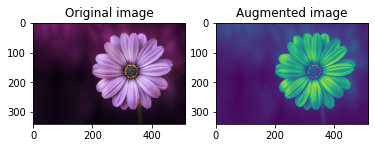

In [ ]:
visualize(image.numpy(), tf.squeeze(grayscaled))

## Saturate an image

In [ ]:
saturated = tf.image.adjust_saturation(image, 3)

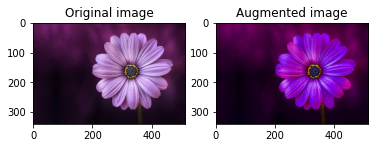

In [ ]:
visualize(image.numpy(), saturated.numpy())

## Change image brightness

In [ ]:
bright = tf.image.adjust_brightness(image, 0.4)

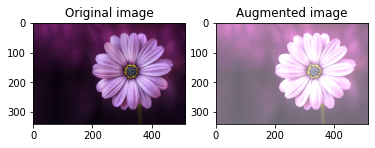

In [ ]:
visualize(image.numpy(), bright.numpy())

## Center crop an image

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.5)

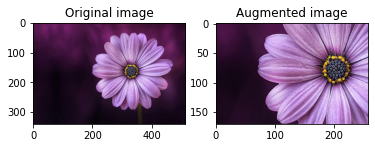

In [ ]:
visualize(image.numpy(), cropped.numpy())

## Rotate an image

In [ ]:
rotated = tf.image.rot90(image)

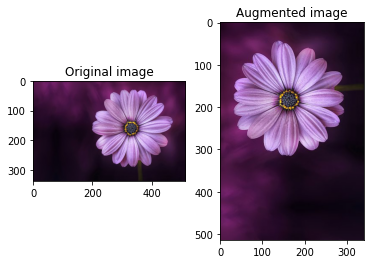

In [ ]:
visualize(image.numpy(), rotated.numpy())

# Preprocess Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from tqdm import tqdm
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [ ]:
dataset_path = "/content/drive/MyDrive/AI_CLASS/4/dataset"

In [ ]:
all_images = []
all_labels = []

for folder in os.listdir(dataset_path):
  folder_path = os.path.join(dataset_path, folder)
  print(folder)

  for file in tqdm(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, file)

    image = tf.keras.preprocessing.image.load_img(file_path)
    image = np.array(image)
    image = tf.convert_to_tensor(image)

    image = tf.image.resize(image, [128, 128])

    all_images.append(image)
    all_labels.append(folder)

2


100%|██████████| 87/87 [00:50<00:00,  1.71it/s]


0


100%|██████████| 360/360 [00:05<00:00, 60.50it/s] 


3


100%|██████████| 312/312 [00:05<00:00, 53.46it/s] 


1


100%|██████████| 108/108 [00:02<00:00, 42.65it/s]


6


100%|██████████| 965/965 [00:21<00:00, 45.10it/s] 


5


100%|██████████| 274/274 [00:05<00:00, 51.14it/s] 


4


100%|██████████| 457/457 [00:09<00:00, 48.95it/s] 


In [ ]:
num_of_classes = 7
all_labels = np.asarray(all_labels, dtype=np.float32)
all_labels = keras.utils.to_categorical(all_labels, num_of_classes)

In [ ]:
all_images = np.asarray(all_images, dtype=np.float32)

In [ ]:
print('All images: ', all_images.shape)
print('All labels: ', all_labels.shape)

All images:  (2563, 128, 128, 3)
All labels:  (2563, 7)


## Split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_images, test_val_images, train_labels, test_val_labels = train_test_split(all_images,
                                                                                all_labels,
                                                                                test_size=0.3,
                                                                                random_state=42)

test_images, val_images, test_labels, val_labels = train_test_split(test_val_images,
                                                                    test_val_labels,
                                                                    test_size=0.5,
                                                                    random_state=42)

print('Train data: ', train_images.shape, train_labels.shape)
print('Val data: ', val_images.shape, val_labels.shape)
print('Test data: ', test_images.shape, test_labels.shape)


Train data:  (1794, 128, 128, 3) (1794, 7)
Val data:  (385, 128, 128, 3) (385, 7)
Test data:  (384, 128, 128, 3) (384, 7)


Label array: [0. 0. 0. 0. 0. 0. 1.] 
Label: 6 
Emotion: Neutral 
Image shape: (128, 128, 3)


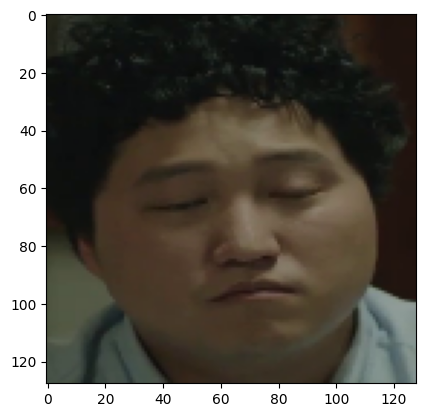

In [ ]:
emotions = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

index = 15
print('Label array:', train_labels[index],
      '\nLabel:', np.argmax(train_labels[index]),
      '\nEmotion:', emotions[np.argmax(train_labels[index])],
      '\nImage shape:', train_images[index].shape)

plt.imshow(np.asarray(train_images[index], dtype='uint8'))
plt.show()

## Normalize the data

In [ ]:
# normalization
train_images /= 255
val_images /= 255
test_images /= 255

# Make model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
image_input_shape = (128, 128, 3)

model = keras.models.Sequential()

model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=image_input_shape))
model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.6))

model.add(layers.Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.6))

model.add(layers.Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.6))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(7, activation='softmax'))

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 127, 127, 64)      832       
                                                                 
 conv2d_89 (Conv2D)          (None, 127, 127, 64)      16448     
                                                                 
 batch_normalization_77 (Ba  (None, 127, 127, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 63, 63, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_77 (Dropout)        (None, 63, 63, 64)        0         
                                                                 
 conv2d_90 (Conv2D)          (None, 63, 63, 128)     

# Train Model

### Set Training Parameters

In [ ]:
batch_size = 128
epochs = 10

# Compiling the model with adam optimizer and categorical crossentropy loss
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.003),
              metrics=['accuracy'])


### Train Model

In [ ]:
history = model.fit(
    train_images, train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(val_images, val_labels),
    verbose=1)

Epoch 1/10
15/15 [==============================] - 20s 985ms/step - loss: 38.6012 - accuracy: 0.2124 - val_loss: 261.4468 - val_accuracy: 0.2935
Epoch 2/10
15/15 [==============================] - 14s 964ms/step - loss: 18.8998 - accuracy: 0.1968 - val_loss: 6.8002 - val_accuracy: 0.1325
Epoch 3/10
15/15 [==============================] - 15s 975ms/step - loss: 8.8140 - accuracy: 0.2062 - val_loss: 2.0756 - val_accuracy: 0.0857
Epoch 4/10
15/15 [==============================] - 15s 972ms/step - loss: 5.6887 - accuracy: 0.2046 - val_loss: 1.9183 - val_accuracy: 0.3714
Epoch 5/10
15/15 [==============================] - 15s 968ms/step - loss: 4.0046 - accuracy: 0.2163 - val_loss: 1.9064 - val_accuracy: 0.3714
Epoch 6/10
15/15 [==============================] - 14s 965ms/step - loss: 2.9176 - accuracy: 0.2235 - val_loss: 1.8925 - val_accuracy: 0.3714
Epoch 7/10
15/15 [==============================] - 14s 960ms/step - loss: 2.4235 - accuracy: 0.2436 - val_loss: 1.8772 - val_accuracy: 0.

### Analyze Training Process

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


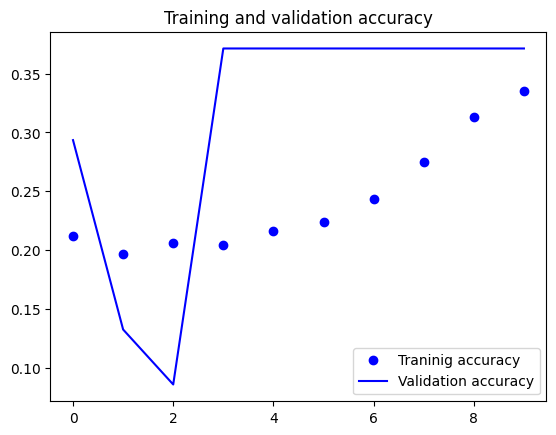

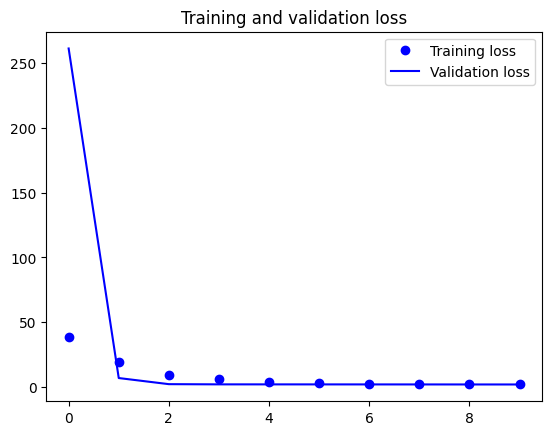

In [ ]:
print(history.history.keys())
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(epochs)), train_accuracy, 'bo', label='Traninig accuracy')
plt.plot(list(range(epochs)), val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(epochs)), train_loss, 'bo', label='Training loss')
plt.plot(list(range(epochs)), val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Evaluate Model

## Test

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Loss:', loss, '\nAccuracy:', accuracy * 100, '%')

12/12 [==============================] - 1s 54ms/step - loss: 1.8339 - accuracy: 0.3802
Loss: 1.8339033126831055 
Accuracy: 38.02083432674408 %


## Sample Prediction

Image shape: (128, 128, 3)
True Image Label Array: [0. 0. 0. 0. 0. 0. 1.] 
True Image Label Shape: (7,) 
True Image Label: Neutral


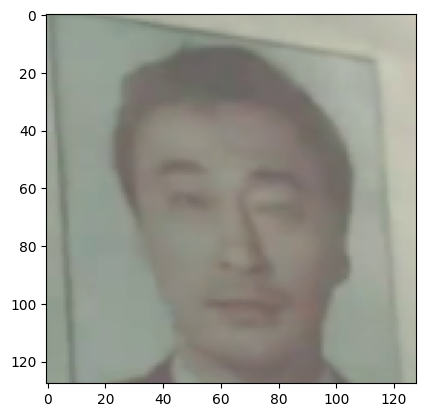

1/1 [==============================] - 0s 105ms/step
Predicted Image Label Array: ['0.15', '0.06', '0.24', '0.07', '0.20', '0.03', '0.24'] 
Predicted Image Label Shape: (1, 7) 
Predicted Image Label: Neutral


In [ ]:
img_id = 1

sample_test_image = test_images[img_id]
sample_test_label = test_labels[img_id]

print('Image shape:', sample_test_image.shape)
print('True Image Label Array:', sample_test_label,
      '\nTrue Image Label Shape:', sample_test_label.shape,
      '\nTrue Image Label:', emotions[np.argmax(sample_test_label)])
plt.imshow(sample_test_image)
plt.show()



prediction = model.predict(sample_test_image.reshape(1, 128, 128, 3))

print('Predicted Image Label Array:', ['{0:0.2f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape,
      '\nPredicted Image Label:', emotions[np.argmax(prediction)])